In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import joblib

In [20]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [21]:
X = dataset.iloc[:, [-1, -2]]
X

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17
...,...,...
195,79,120
196,28,126
197,74,126
198,18,137


c:\Users\140541\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\140541\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\140541\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\140541\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

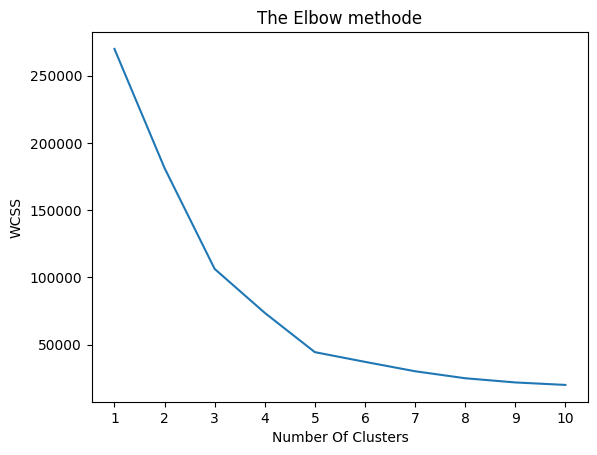

In [22]:
wcss = []
for cluster in range(1, 11):
  kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.title("The Elbow methode")
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

c:\Users\140541\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [24]:
X['y_kmeans'] = y_kmeans
X

C:\Users\140541\AppData\Local\Temp\ipykernel_8816\1663131325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y_kmeans'] = y_kmeans


,Spending Score (1-100),Annual Income (k$),y_kmeans
0,39,15,4
1,81,15,2
2,6,16,4
3,77,16,2
4,40,17,4
...,...,...,...
195,79,120,1
196,28,126,3
197,74,126,1
198,18,137,3


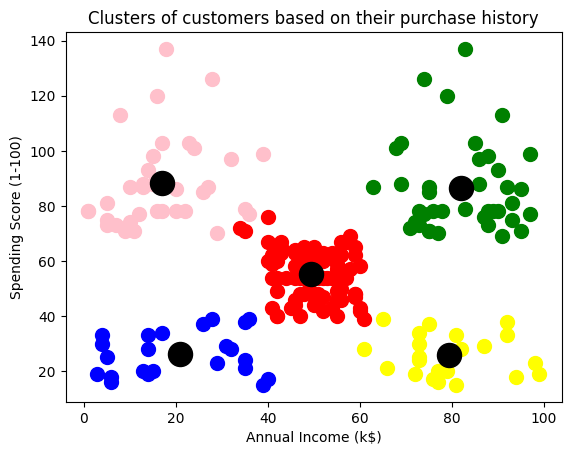

In [25]:
X = np.array(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'pink', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'blue', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'centers')
plt.title("Clusters of customers based on their purchase history")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [26]:
joblib.dump(y_kmeans,'Mall_Customer_Segmentation.pkl')

['Mall_Customer_Segmentation.pkl']